## Group No 12

# Introduction

The venerable insurance industry is no stranger to data driven decision making. Yet in today's rapidly transforming digital landscape, Insurance is struggling to adapt and benefit from new technologies compared to other industries.  Extremely complex underwriting rule-sets that are radically different in different product lines, many non-KYC environments with a lack of centralized customer information base, complex relationship with consumers in traditional risk underwriting where sometimes customer centricity runs reverse to business profit, inertia of regulatory compliance - are some of the unique challenges faced by Insurance Business. 

Inurance premium vary over person to person. Insurance companies decide the charges for a perticular person based on the probability of happening of an event prescribed in the helth insurance. To avoid loss companies take the account of personal attributes of the person to calculate the probability of happening of an event. In this project we want to predict the insurance charges using data which includes attributes of the people and charges applied to them
    



## Brief discription of the attributes in the dataset
 1) age: age of primary beneficiary 
 
 2) sex: gender of the beneficiary (male,female)  
 
 3) bmi: Body mass index, providing an understanding of body,weights that     are relatively high or low relative to height, objective index of body     weight(kg/m) using the ratio of height to weight, ideally 18.5 to 24.9 
 
 4) children: Number of children covered by health insurance/ Number of dependent  
 
 5) smoker: if the beneficiary is smoker or not  
 
 6) region: the beneficiary's residential area in the US,northeast,southeast,northwest,southwest  
 
 7) charges: individual medical premium billed by health insurance.  

### Dataset source :
* Dataset url: https://www.kaggle.com/awaiskaggler/insurance-csv/metadata

# Problem Statement
 The goal of this project is to predict the charges based on the attributes related to the person such as age, gender, bmi, region he belongs to, number of children and if he/she is a smoker.

# Importing Libraries

In [161]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Importing Dataset

In [162]:
df = pd.read_csv('favourable/insurance.csv')

# Exploratory Data Analysis (EDA)  
EDA is a step in data analysis process where a number of techniques are used to understand the dataset better. 

In [163]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [140]:
df.info()  # it gives the total rows, colums and datatype. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 57.6+ KB


We can see that varibles such as sex, smoker and region are of object type and other varibles are numerical so we need to convert the varibles with object type into numerical type 

# Checking present of Null values

In [8]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [9]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


the described method will help to see how data has been spread for nemerical value
we can clearly see the minumum value,mean,maximum value,percentile value.

# Data visulization

## Histograms
   Histogram are one of the most common graphs used to display numeric data
    distribution of the data whether the data is normally distributed or if 
    it is skewed right or left

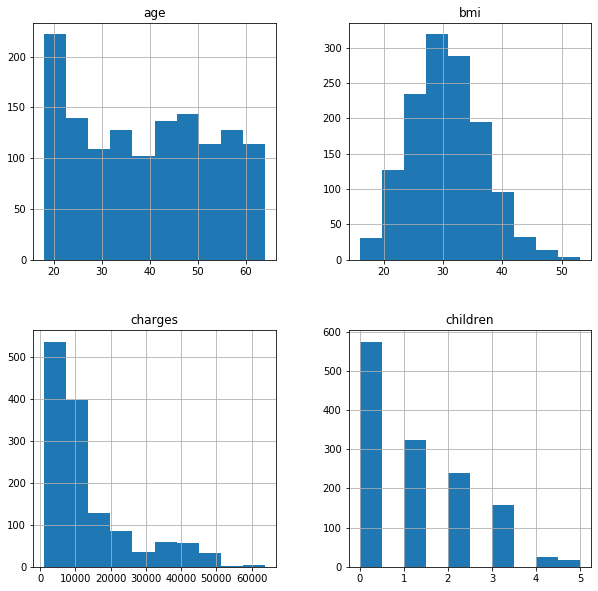

In [10]:
df.hist(bins=10,figsize=(10,10))
plt.show()

## Scatter Plot
 A scatterplot is a type of graph which plots the values of two variables along
    two axes, like age and height. Scatterplot are useful for many reason like correlation
    matrics.it allows you to quickly understand a relationship between two variable.

Text(0, 0.5, 'charges')

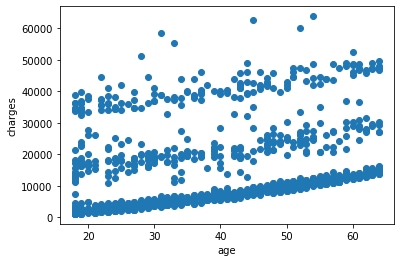

In [11]:
plt.scatter(df["age"],df["charges"])
plt.xlabel("age")
plt.ylabel("charges")

Text(0, 0.5, 'charges')

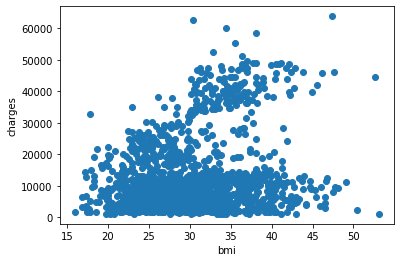

In [12]:
plt.scatter(df["bmi"],df["charges"])
plt.xlabel("bmi")
plt.ylabel("charges")

# Checking if the outliers are present

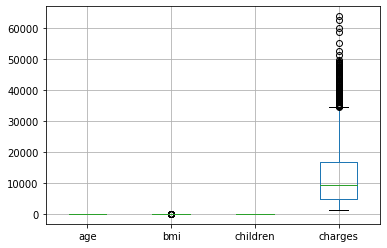

In [13]:
df.boxplot()

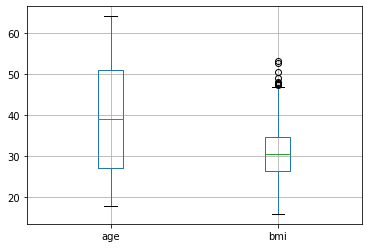

In [14]:
df.boxplot(['age','bmi'])

#### We have to remove the outliers but we have limited data points so rather than removing the outliers we will use clipping method  



In [164]:
data_clip = df.iloc[:]
columns = ['bmi','charges']
def clipValues(data_clip,lower,upper):
    for col in columns:
        l=data_clip[col].quantile(lower) 
        u=data_clip[col].quantile(upper)
        data_clip[col]=data_clip[col].clip(l,u)
    return data_clip
data=clipValues(data_clip,0.05,0.9)

In [165]:
#cheak the all outliers are removed or not

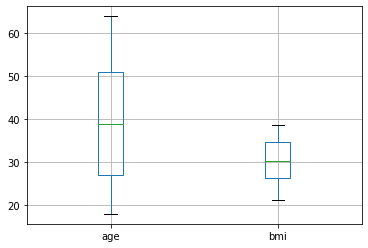

In [166]:
data.boxplot(['age','bmi'])

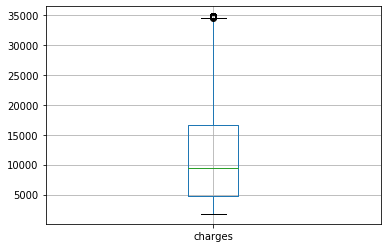

In [18]:
df.boxplot(['charges'])

#### from the above plots we can see that outliers are removed

# Label Encoding

We need to do label encoding to convert object type variables into numerical type so that we can use those variables in the model 

In [167]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data["sex"]=le.fit_transform((data['sex']))
data["smoker"]=le.fit_transform((data['smoker']))
data["region"]=le.fit_transform((data['region']))

In [168]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1757.75340
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


Now all the variables are in the numerical type

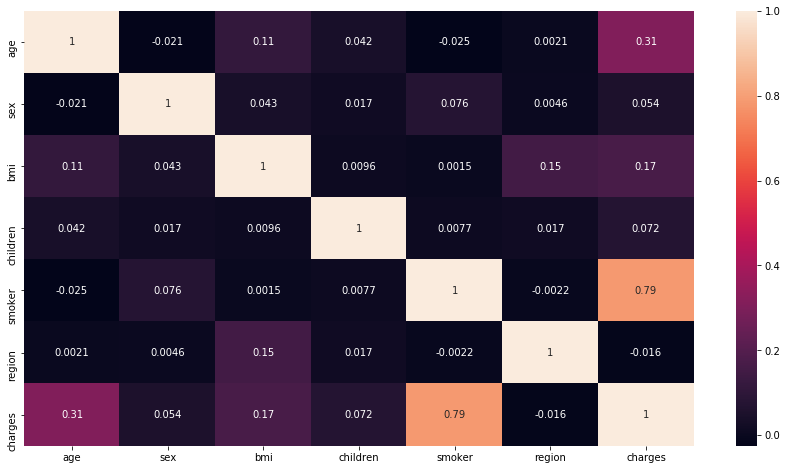

In [21]:
plt.figure(figsize=(15,8))
sns.heatmap(data.corr(),annot=True)

## Assumtions of LinearRegression

###### 1 Linear Relationship between the independent x and dependent y

###### Relationship between age and charges

Text(0, 0.5, 'charges')

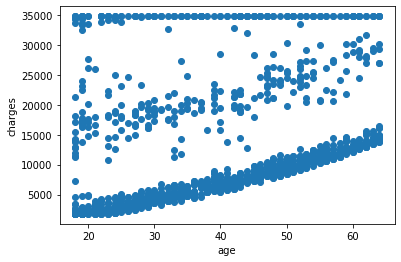

In [153]:
plt.scatter(df["age"],df["charges"])
plt.xlabel("age")
plt.ylabel("charges")

#### Variables age and charges are linearly associated with each other

### 2.Homoscedasticity 

Text(0, 0.5, 'Residuals')

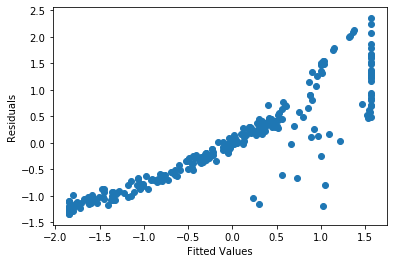

In [154]:
plt.scatter(ytest.values,ypred)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")

From the above plot we can conclude that we dont have homoscedasticity in the data

### 3. Normality of Residuals

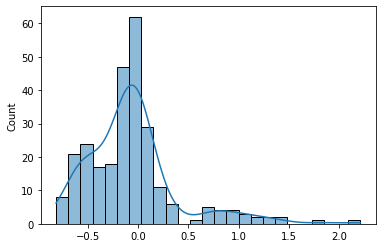

In [155]:
residuals = ytest.values - ypred
sns.histplot(residuals,kde=True)

We can see that the Residuals have normal distribution

### 4. Mean of Residuals

In [156]:
print("Mean of Residual is :", np.mean(residuals))

Mean of Residual is : -0.0678120717814524


We can see that the residuals have mean = 0

### 5.No Autocorrelation

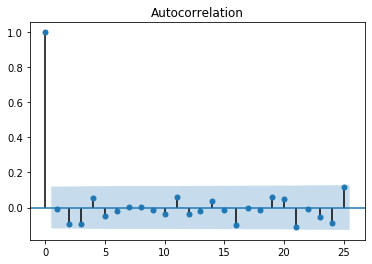

In [157]:
import statsmodels.api as sm
sm.graphics.tsa.plot_acf(residuals)
plt.show()

From the above acf plot we can conclude that the there is no autocorrelatiion is the data.

### 6. No Perfect Multicolinearity 

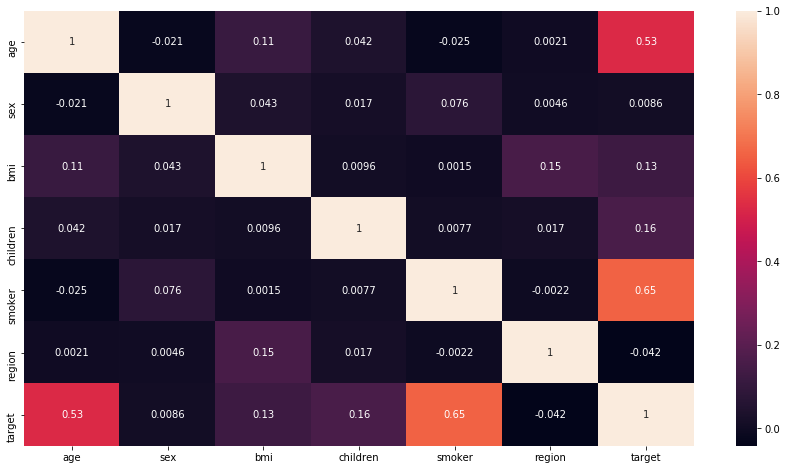

In [158]:
plt.figure(figsize = (15,8))
sns.heatmap(data.corr(),annot = True)

In [159]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def get_vif(df):
    d={}
    for i in range(df.shape[1]):
        d[df.columns[i]]=variance_inflation_factor(df.values,i)
    return d
get_vif(data.drop(columns = ['target']))

{'age': 7.9129385711541875,
 'sex': 2.0088589253199283,
 'bmi': 11.045882593807452,
 'children': 1.8055690975035241,
 'smoker': 1.2581951856151359,
 'region': 2.9348837902311207}

From the above heatmap we can conclude that there is no multicolinearity between the varibles Also except var bmi the vif of our variables are low

## Detect problems within variables

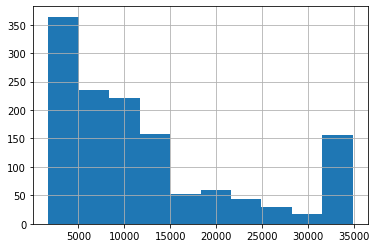

In [25]:
data['charges'].hist()

Even after removing the ouliers from the variable charges, charges column is skewed. So deal with that we will be transforming the column charges using log transformation 

### Transforming charges using log transformation

In [169]:
data['target']=np.log(data.charges)

In [170]:
data = data.drop(columns = ['charges'] )

# Fit the Linear Regression model

### Taking dependent and indepedent variables

In [84]:
x=data.drop(columns=['target'])
y=data['target']

### Splitting data into train and test

In [85]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=5)

In [86]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(xtrain,ytrain)
ypred=model.predict(xtest)

In [87]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
mse=mean_squared_error(ytest,ypred)
print('mse',mse)
rmse=np.sqrt(mse)
print('rmse',rmse)
mae=mean_absolute_error(ytest,ypred)
print('mae',mae)
score=r2_score(ytest,ypred)
print('r2_score',score)

mse 0.15775244450332912
rmse 0.3971806194961294
mae 0.27425270517265365
r2_score 0.8094588020761081


#### After applying the linear regression model to the data we get the R2 score of about 0.8094 and the errors are relatively low

## Feature scaling

In [88]:
data.head()

,age,sex,bmi,children,smoker,region,target
0,19,0,27.900,0,1,3,9.734176
1,18,1,33.770,1,0,2,7.471792
2,28,1,33.000,3,0,2,8.400538
3,33,1,22.705,0,0,1,9.998092
4,32,1,28.880,0,0,1,8.260197


As we can see that the bmi and age values are in two digits where as other variables are single digits which can be missleading for the model as it may weigh more to the variables with large even if they are not that important compared to variables with small values.

So to deal with that we will do feature scaling. Wich will convert data in same range. for feature sscaling we are using standard scalar

In [171]:
from sklearn.preprocessing import StandardScaler
data2 = data.iloc[:]
sc = StandardScaler()
data1 = sc.fit_transform(data2)
data3=pd.DataFrame(data1,columns=data.columns)
data3

,age,sex,bmi,children,smoker,region,target
0,-1.438764,-1.010519,-0.479797,-0.908614,1.970587,1.343905,0.741304
1,-1.509965,0.989591,0.633003,-0.078767,-0.507463,0.438495,-1.851984
2,-0.797954,0.989591,0.487031,1.580926,-0.507463,0.438495,-0.787396
3,-0.441948,0.989591,-1.464634,-0.908614,-0.507463,-0.466915,1.043820
4,-0.513149,0.989591,-0.294014,-0.908614,-0.507463,-0.466915,-0.948265
...,...,...,...,...,...,...,...
1333,0.768473,0.989591,0.102196,1.580926,-0.507463,-0.466915,0.207701
1334,-1.509965,-1.010519,0.282291,-0.908614,-0.507463,-1.372326,-1.591627
1335,-1.509965,-1.010519,1.216891,-0.908614,-0.507463,0.438495,-1.851984
1336,-1.296362,-1.010519,-0.877902,-0.908614,-0.507463,1.343905,-1.699445


# Fit the linear regression model

In [172]:
x=data3.drop(columns=['target'])
y=data3['target']

In [173]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=5)

In [174]:
model=LinearRegression()
model.fit(xtrain,ytrain)
ypred=model.predict(xtest)

In [175]:
linear_mse=mean_squared_error(ytest,ypred)
print("MSE:",linear_mse)
linear_rmse = np.sqrt(linear_mse)
print("RMSE:",linear_rmse)
linear_mae=mean_absolute_error(ytest,ypred)
print("MAE:",linear_mae)
linear_score=r2_score(ytest,ypred)
print("R-squared :",linear_score)

MSE: 0.20727395189554876
RMSE: 0.4552734913165368
MAE: 0.3143657581917225
R-squared : 0.8094588020761082


#### Even after applying feature scaling our model accuracy didnt change so we go the other regression types such as polynomial regression

# Fit the Polynomial Regression Model

In [176]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=2)
poly_reg.fit(xtrain)
x_train_poly=poly_reg.transform(xtrain)
x_test_poly=poly_reg.transform(xtest)

In [177]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train_poly,ytrain)
y_pred=lr.predict(x_test_poly)

In [178]:
poly_mse=mean_squared_error(ytest,y_pred)
print("MSE:",poly_mse)
poly_rmse = np.sqrt(poly_mse)
print("RMSE:",poly_rmse)
poly_mae=mean_absolute_error(ytest,y_pred)
print("MAE:",poly_mae)
poly_score=r2_score(ytest,y_pred)
print("R-squared :",poly_score)

MSE: 0.1275823438992272
RMSE: 0.35718670733837116
MAE: 0.21141205616710324
R-squared : 0.8827170880943737


#### Polynomial regression fits really well and we got the R2 score of 0.88 with relatively low errors 

# Fit the Ridge Regression model

In [179]:
from sklearn.linear_model import Ridge
ridge=Ridge(alpha=0.3)
ridge.fit(xtrain,ytrain)
rypred=ridge.predict(xtest)

In [180]:
ridge_mse=mean_squared_error(ytest,rypred)
print('mse',ridge_mse)
ridge_rmse=np.sqrt(ridge_mse)
print('rmse',ridge_rmse)
ridge_mae=mean_absolute_error(ytest,rypred)
print('mae',ridge_mae)
ridge_score=r2_score(ytest,rypred)
print('r2_score',ridge_score)

mse 0.20731316970712993
rmse 0.45531655988677805
mae 0.31443219920096876
r2_score 0.8094227502291188


#### R2 score obtained from Ridge regression is same as linear regression

# fit the Lasso Regression model

In [181]:
from sklearn.linear_model import Lasso
lasso=Lasso(alpha=0.0001)
lasso.fit(xtrain,ytrain)
lypred=lasso.predict(xtest)

In [182]:
lasso_mse=mean_squared_error(ytest,lypred)
print('mse',lasso_mse)
lasso_rmse=np.sqrt(lasso_mse)
print('rmse',lasso_rmse)
lasso_mae=mean_absolute_error(ytest,lypred)
print('mae',lasso_mae)
lasso_score=r2_score(ytest,lypred)
print('r2_score',lasso_score)

mse 0.20728877974129103
rmse 0.4552897755729762
mae 0.3143643244198621
r2_score 0.8094451712485753


#### R2 score obtained from lasso regression is same as linear regression and ridge regression

# Fit the ElasticNet Regression Model

In [183]:
from sklearn.linear_model import ElasticNet

In [184]:
alpha=[0.0001,0.001,0.01,0.1,0.3,0.5,1,10]

In [185]:
# function for getting best alpha value
scores={}
def get_best_alpha(alpha):
    for i in alpha:
        model=ElasticNet(alpha=i)
        model.fit(xtrain,ytrain)
        ypred=model.predict(xtest)
        elastic_mse=mean_squared_error(ytest,ypred)
        elastic_rmse=np.sqrt(elastic_mse)
        elastic_mae=mean_absolute_error(ytest,ypred)
        scores[i]=model.score(xtest,ytest)
        #print(" For Alpha = {} | R-square :{} MSE :{} RMSE :{} MAE:{} ".format(i,model.score(xtest,ytest),mse,rmse,mae))
    return max(scores, key= lambda x: scores[x]),elastic_mse,elastic_rmse,elastic_mae

In [186]:
best_score,elastic_mse,elastic_rmse,elastic_mae=get_best_alpha(alpha)
print('mse',elastic_mse)
print('rmse',elastic_rmse)
print('mae',elastic_mae)

mse 1.112182155927492
rmse 1.0546004721824715
mae 0.8775927378573127


In [187]:
print("Best Alpha is :",best_score)
print('R_square of the model is :',scores[0.0001])

Best Alpha is : 0.0001
R_square of the model is : 0.8094455755700624


# Final Evaluation

In [188]:
models = ['LinearRegression','Polynomial','Ridge','Lasso','ElasticNet']
rsquare = [linear_score,poly_score,ridge_score,lasso_score,scores[0.0001]]
mse = [linear_mse,poly_mse,ridge_mse,lasso_mse,elastic_mse]
rmse = [linear_rmse,poly_rmse,ridge_rmse,lasso_rmse,elastic_rmse]
mae = [linear_mae,poly_mae,ridge_mae,lasso_mae,elastic_mae]
Evaluation = pd.DataFrame({'Model':models,'R-square':rsquare,'MSE':mse,'RMSE':rmse,'MAE':mae})

In [189]:
Evaluation.style.highlight_max(subset = ['R-square'],color = 'lightgreen')

,Model,R-square,MSE,RMSE,MAE
0,LinearRegression,0.809459,0.207274,0.455273,0.314366
1,Polynomial,0.882717,0.127582,0.357187,0.211412
2,Ridge,0.809423,0.207313,0.455317,0.314432
3,Lasso,0.809445,0.207289,0.455290,0.314364
4,ElasticNet,0.809446,1.112182,1.054600,0.877593


Text(0.5, 1.0, 'Evaluation of models')

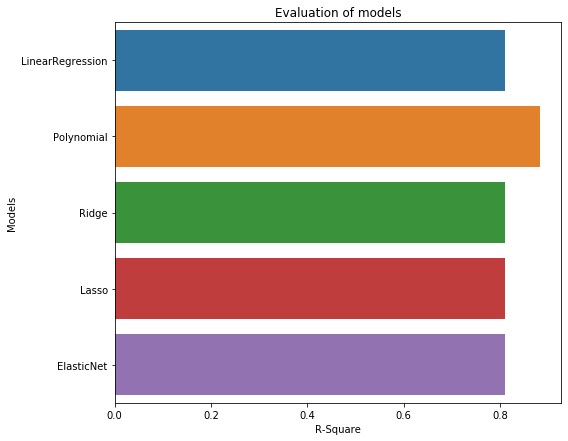

In [196]:
plt.figure(figsize = (8,7))
sns.barplot(x=rsquare, y=models)
plt.xlabel('R-Square')
plt.ylabel('Models')
plt.title('Evaluation of models')

# Conclusion

#### Considering R2 score and other parameter it is observed that Polynomial regression for  2nd degree turned out to be most accurate to predict the issurance charges.

# Done